In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### target值为第二天收盘时的价格。

In [46]:
df1=pd.read_excel('./stock-price-prediction-BPNN-LSTM/data.xlsx',0)
df1=df1.iloc[3600:-10,1:]
df1.tail()

,开盘,最高,最低,收盘,涨幅,振幅,总手,金额,换手%,成交次数,target
6920,1630.46,1665.46,1614.20,1656.71,0.036,0.0321,118020026,1472909400,0.608,67052,1689.22
6921,1690.47,1714.22,1667.96,1689.22,0.0196,0.0279,113695774,1467535000,0.586,60751,1712.97
6922,1677.96,1747.98,1670.46,1712.97,0.0141,0.0459,107519243,1408651100,0.554,59522,1724.22
6923,1736.72,1752.98,1715.47,1724.22,0.0066,0.0219,65301888,861618660,0.337,38464,1697.97
6924,1686.72,1710.47,1675.46,1697.97,-0.0152,0.0203,66173879,852956240,0.341,37324,1680.46


In [47]:
X=df1.iloc[:,:-1]
y=df1['target']
print(X.shape)
print(y.shape)

(3325, 10)
(3325,)


In [49]:
cut=10
df_train=df1.iloc[:-cut]  ## 第一时间划分train test set
df_test=df1.iloc[-cut:]

In [41]:
##进行数据归一化
from sklearn import preprocessing  ## scaling
min_max_scaler=preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df=pd.DataFrame(df0,columns=df1.columns)
df.head()

,开盘,最高,最低,收盘,涨幅,振幅,总手,金额,换手%,成交次数,target
0,0.000195,0.000000,0.000198,0.000586,0.543457,0.096101,0.003217,0.000000,0.026171,0.000000,0.000000
1,0.000586,0.000000,0.000000,0.000000,0.412587,0.126853,0.007019,0.000684,0.041722,0.001194,0.000293
2,0.000000,0.000096,0.000098,0.000293,0.543956,0.129599,0.006717,0.000637,0.040489,0.000437,0.000487
3,0.000293,0.000096,0.000395,0.000487,0.528472,0.080176,0.009546,0.001161,0.052152,0.001112,0.000389
4,0.000586,0.000096,0.000395,0.000389,0.485015,0.079627,0.008846,0.001027,0.049213,0.002331,0.002922


In [33]:
y=pd.DataFrame(y.values,columns=['goal'])
x=X
cut=10 #最后10天的数据为test set
X_train,X_test=x.iloc[:-cut],x.iloc[-cut:]
y_train,y_test=y.iloc[:-cut],y.iloc[-cut:]
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values

In [34]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

33190
100
3319
10


In [35]:
##build bp model and training
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import Adam

In [36]:
model=Sequential()  #层次（堆叠）模型
model.add(Dense(16,input_dim=10,kernel_initializer='uniform'))
model.add(Activation('relu')) # 添加激活函数
model.add(Dense(4,kernel_initializer='uniform')) #中间层
model.add(Activation('sigmoid')) # 添加激活函数
model.add(Dense(1))  ##输出层
model.compile(loss='mean_squared_error',optimizer='Adam') #编译模型
model.fit(X_train,y_train,epochs=50,batch_size=256)

Epoch 1/50
13/13 [==============================] - 0s 855us/step - loss: 5585815.5000
Epoch 2/50
13/13 [==============================] - 0s 839us/step - loss: 5585570.0000
Epoch 3/50
13/13 [==============================] - 0s 802us/step - loss: 5585278.5000
Epoch 4/50
13/13 [==============================] - 0s 856us/step - loss: 5584926.0000
Epoch 5/50
13/13 [==============================] - 0s 911us/step - loss: 5584509.0000
Epoch 6/50
13/13 [==============================] - 0s 798us/step - loss: 5584020.0000
Epoch 7/50
13/13 [==============================] - 0s 800us/step - loss: 5583470.5000
Epoch 8/50
13/13 [==============================] - 0s 874us/step - loss: 5582872.0000
Epoch 9/50
13/13 [==============================] - 0s 798us/step - loss: 5582249.5000
Epoch 10/50
13/13 [==============================] - 0s 954us/step - loss: 5581630.0000
Epoch 11/50
13/13 [==============================] - 0s 855us/step - loss: 5581034.0000
Epoch 12/50
13/13 [======================

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                176       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
_________________________________________________________________
activation_3 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [38]:
y_train_predict=model.predict(X_train)

In [39]:
y_train_predict=y_train_predict[:,0]
len(y_train_predict)

3319

In [40]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw

,0,0
0,185.26,2.268817
1,186.90,2.243911
2,187.99,2.282349
3,187.44,2.269850
4,201.63,2.256283
...,...,...
3314,4634.03,2.458522
3315,4577.73,2.457650
3316,4512.28,2.457775
3317,4393.15,2.457950


Text(0.5, 1.0, 'Train Data')

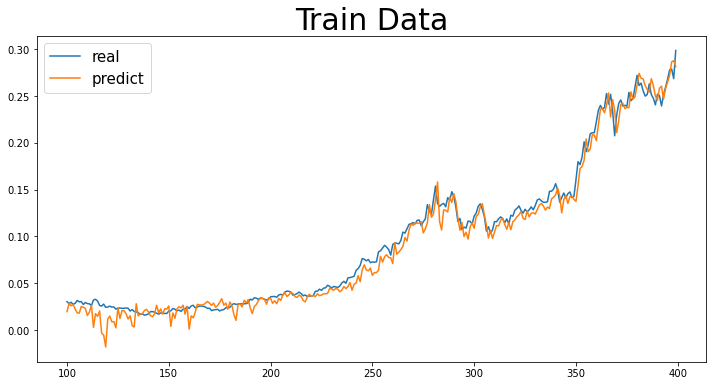

In [17]:
draw.iloc[100:400,0].plot(figsize=(12,6))
draw.iloc[100:400,1].plot(figsize=(12,6))
plt.legend(('real','predict'),fontsize='15')
plt.title('Train Data',fontsize='30')

In [18]:
# predict the test set
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

Text(0.5, 1.0, 'Test Data')

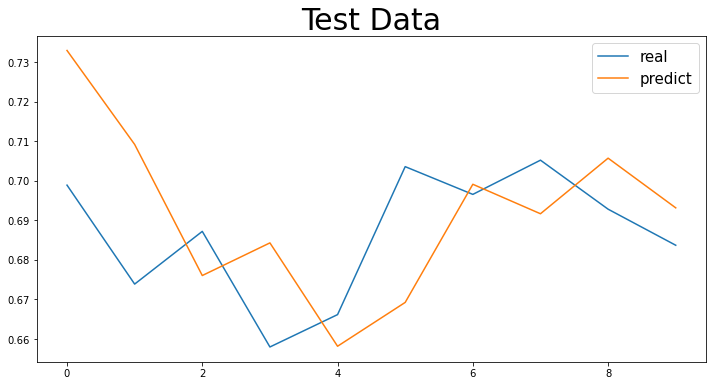

In [19]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1)
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real','predict'),fontsize='15')
plt.title('Test Data',fontsize='30')

In [22]:
#输出结果

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_pred,y_true):
    return np.mean(np.abs((y_pred-y_true)/y_true))*100
print('Training data: MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict,y_train) )
print('Test data: MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict,y_test))

Training data: MAE/MSE/MAPE
0.009530024151069759
0.00020478714546926695
inf
Test data: MAE/MSE/MAPE
0.018754584958072317
0.000490748255466852
3.0307287589172933


<ipython-input-22-720e7c2dd7bf>:7: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_pred-y_true)/y_true))*100


In [23]:
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test)-1):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

预测涨跌正确: 0.2222222222222222
